In [1]:
#importing python script having all required libraries imported
# script also contains a function to clean and generate tokenized tweets 
from tweet_cleaning import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\akram\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
#importing tweets
data = pd.read_csv(r'D:\Academics\Project-Social Media Mining\New file\coods\covid-allcood.csv')
#data=data.head(1000)

In [3]:
print(data.shape)
data.head()

(294419, 9)


,created_at,id,lang,text,user_location,city,country,latitude,longitude
0,2020-01-23 22:36:49,1220475499366862849,en,"RT @WHO: BREAKING: ""I am not declaring a publi...",Waikiki,Honolulu,United States of America,21.304547,-157.855676
1,2020-01-26 19:35:19,1221516989115531264,en,Thinking of those affected by the Wuhan/corona...,New York,New York,United States of America,40.712728,-74.006015
2,2020-01-24 01:56:26,1220525734839701505,en,RT @cnni: The first person diagnosed with the ...,Cloud N.09,Limoges,France,45.835424,1.264485
3,2020-01-26 06:39:18,1221321697263001603,en,RT @Unkle_K: This is how the coronavirus started,"Maryland, USA",Maryland,United States of America,39.516223,-76.938207
4,2020-01-27 18:43:30,1221866335979941889,en,"Coronavirus, Yesterday’s tragedies all those f...",NYC,New York,United States of America,40.712728,-74.006015


In [4]:
# storing tweets into a list to loop
lines=data['text'].tolist()

In [5]:
# Creating a list for cleaned sentences after the preprocessing is done
train_clean_sentences = []
for line in lines:
    line = line.strip()
    # calling clean function on each tweet
    cleaned = clean(line)
    cleaned = ' '.join(cleaned)
    if(len(cleaned)==0):
        continue
    # Appending all the cleaned tweets into the list    
    train_clean_sentences.append(cleaned)
#print(train_clean_sentences)

In [6]:
# Creating a datframe from the list of cleaned tweets 
Cleaned_tweets = pd.DataFrame(train_clean_sentences, columns=['cleaned_tweets'])

In [7]:
Cleaned_tweets.head(10)

,cleaned_tweets
0,breaking declaring public health emergency int...
1,thinking affected virus
2,first person diagnosed wuhan treated medical w...
3,started
4,yesterdays tragedies family members lost impea...
5,know china lies know epicentre wuhan know chin...
6,save life
7,viral video asked travel part discussion panel...
8,another video showing medics completely burn a...
9,wearing face mask help properly wing universit...


In [8]:
#from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
# the vectorizer object will transform tweet text into a vector
#vectorizer = CountVectorizer(min_df=10, token_pattern='[a-zA-Z0-9]{3,}')
vectorizer = TfidfVectorizer(stop_words='english', min_df=10, token_pattern='[a-zA-Z0-9]{3,}')
# applying transformation
tf = vectorizer.fit_transform(Cleaned_tweets['cleaned_tweets']) #.toarray()
# storing names of each column in the matrix
tf_feature_names = vectorizer.get_feature_names()
tf.shape

(292970, 13446)

In [9]:
# importing LDA model from Sklearn to apply topic modelling
from sklearn.decomposition import LatentDirichletAllocation
# importing grid serach cv module to find best parameters for the model 
from sklearn.model_selection import GridSearchCV
params = {'n_components': [10]}

# Initializing the Model
lda = LatentDirichletAllocation()

# Init Grid Search Class
model = GridSearchCV(lda, param_grid=params)

# Do the Grid Search
model.fit(tf)

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method='batch',
                                                 learning_offset=10.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=None,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                   

In [10]:
'''from sklearn.decomposition import LatentDirichletAllocation
number_of_topics = 10
best_lda_model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45, n_jobs=-1) # random state for reproducibility
#lda_output= best_lda_model.fit_transform(tf)
#data_dense = tf.todense()'''

'from sklearn.decomposition import LatentDirichletAllocation\nnumber_of_topics = 10\nbest_lda_model = LatentDirichletAllocation(n_components=number_of_topics, random_state=45, n_jobs=-1) # random state for reproducibility\n#lda_output= best_lda_model.fit_transform(tf)\n#data_dense = tf.todense()'

In [11]:
# storing model with best parameters in object
best_lda_model = model.best_estimator_

# printing best parameters obtained from gridsearch cv
print("Best Model's Params: ", model.best_params_)

Best Model's Params:  {'n_components': 10}


In [12]:
#lda_output = best_lda_model.fit_transform(tf)
lda_output = best_lda_model.transform(tf)

# creating a topic matrix

# index names
docnames = ["Doc" + str(i) for i in range(len(train_clean_sentences))]
# storing column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# creating a list of best topic for each document and storing in dataframe
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

df_document_topics = df_document_topic.head(15)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.03,0.03,0.03,0.03,0.24,0.03,0.03,0.55,0.03,0.03,7
Doc1,0.32,0.04,0.04,0.04,0.04,0.04,0.04,0.04,0.39,0.04,8
Doc2,0.03,0.03,0.03,0.03,0.03,0.03,0.03,0.73,0.03,0.03,7
Doc3,0.05,0.05,0.05,0.05,0.05,0.05,0.55,0.05,0.05,0.05,6
Doc4,0.02,0.16,0.02,0.02,0.02,0.15,0.02,0.02,0.02,0.52,9
Doc5,0.02,0.02,0.02,0.02,0.02,0.02,0.36,0.02,0.48,0.02,8
Doc6,0.04,0.04,0.04,0.63,0.04,0.04,0.04,0.04,0.04,0.04,3
Doc7,0.03,0.03,0.03,0.41,0.03,0.39,0.03,0.03,0.03,0.03,3
Doc8,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.79,9
Doc9,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.02,0.78,0.02,8


In [13]:
# creating dataframe with count of documents in each topic
df_topic_distribution = df_document_topic['dominant_topic'].value_counts().reset_index(name="Num Documents")
df_topic_distribution.columns = ['Topic Num', 'Num Documents']
df_topic_distribution

,Topic Num,Num Documents
0,2,37955
1,7,35883
2,0,32748
3,1,32348
4,3,31316
5,4,29844
6,8,25070
7,5,24710
8,9,22510
9,6,20586


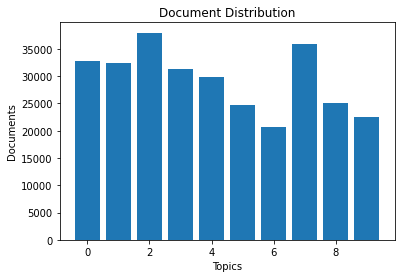

In [14]:
# bar plot of document distribution in each topic
# it is very clear that all topics had almost equal number of documents 
plt.title('Document Distribution')
plt.xlabel('Topics')
plt.ylabel('Documents')
plt.bar(df_topic_distribution['Topic Num'], df_topic_distribution['Num Documents'])
plt.show()

In [15]:
# installing pyLDAvis library
#!pip install pyLDAvis

In [16]:
# importing pyLDAvis library which helps in understanding topic generated and gives good representation of words in each topic
import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

panel = pyLDAvis.sklearn.prepare(best_lda_model, tf, vectorizer, mds='tsne')
panel

PreparedData(topic_coordinates=               x           y  topics  cluster       Freq
topic                                                   
2      10.976401    5.050621       1        1  11.880250
7      89.001503   17.620462       2        1  11.746463
1     -42.054298   63.649853       3        1  10.818945
4     -88.197029  -67.729477       4        1  10.397198
3     -10.170555  -55.160252       5        1  10.312161
0      42.858528 -113.759567       6        1  10.098764
8      68.075722  -48.823128       7        1   9.186776
5     -67.269180   -1.286992       8        1   9.163550
9     -33.863216 -122.615013       9        1   8.552334
6      34.667271   72.505997      10        1   7.843559, topic_info=      Category         Freq         Term        Total  loglift  logprob
1742   Default  3002.000000        cases  3002.000000  30.0000  30.0000
13137  Default  1618.000000         wear  1618.000000  29.0000  29.0000
7303   Default  1941.000000         mask  1941.000000  28.0000  28.0000
2442   Default  1196.000000    confirmed  1196.000000  27.0000  27.0000
11393  Default  1114.000000      started  1114.000000  26.0000  26.0000
3575   Default  1368.000000   distancing  1368.000000  25.0000  25.0000
3030   Default  1649.000000       deaths  1649.000000  24.0000  24.0000
11119  Default  1663.000000       social  1663.000000  23.0000  23.0000
11423  Default  1614.000000         stay  1614.000000  22.0000  22.0000
1741   Default  1223.000000         case  1223.000000  21.0000  21.0000
8993   Default  1401.000000     positive  1401.000000  20.0000  20.0000
9972   Default   729.000000     reported   729.000000  19.0000  19.0000
10477  Default   831.000000         save   831.000000  18.0000  18.0000
7945   Default  3190.000000          new  3190.000000  17.0000  17.0000
12265  Default   690.000000        total   690.000000  16.0000  16.0000
1977   Default  3484.000000        china  3484.000000  15.0000  15.0000
13379  Default  1875.000000        wuhan  1875.000000  14.0000  14.0000
5436   Default   609.000000        hands   609.000000  13.0000  13.0000
12060  Default  1188.000000       tested  1188.000000  12.0000  12.0000
13093  Default   462.000000         wash   462.000000  11.0000  11.0000
12227  Default   544.000000         toll   544.000000  10.0000  10.0000
4953   Default   571.000000         fuck   571.000000   9.0000   9.0000
3029   Default  1199.000000        death  1199.000000   8.0000   8.0000
8072   Default   838.000000       number   838.000000   7.0000   7.0000
5683   Default  1871.000000         home  1871.000000   6.0000   6.0000
6915   Default  1152.000000         life  1152.000000   5.0000   5.0000
12470  Default  2888.000000        trump  2888.000000   4.0000   4.0000
10391  Default   838.000000         safe   838.000000   3.0000   3.0000
12757  Default   790.000000       update   790.000000   2.0000   2.0000
9977   Default   618.000000      reports   618.000000   1.0000   1.0000
...        ...          ...          ...          ...      ...      ...
9072   Topic10   119.297183  precautions   176.580007   2.1533  -6.2183
3628   Topic10   297.453747       doctor   686.866642   1.7086  -5.3046
10679  Topic10   160.193224        sense   278.344307   1.9930  -5.9235
7190   Topic10   271.310028       making   682.810613   1.6225  -5.3966
2296   Topic10   156.689573       common   292.465243   1.9214  -5.9456
9672   Topic10   396.106552       really  1294.990284   1.3609  -5.0182
8293   Topic10   481.321671     outbreak  1819.279569   1.2158  -4.8234
11322  Topic10   390.260805       spread  1418.055424   1.2553  -5.0331
6973   Topic10   176.036001       listen   373.208014   1.7940  -5.8292
12974  Topic10   542.255299        virus  2724.591046   0.9311  -4.7042
4787   Topic10   168.266737        folks   353.657799   1.8027  -5.8743
5861   Topic10   120.937828          icu   206.284773   2.0115  -6.2046
8646   Topic10   559.332444       people  4305.688851   0.5045  -4.6732
13207  Topic10   239.267625      

In [17]:
# The distance between each blob shows the semantic difference between the topics

In [18]:
#function to create data with top 15 words from topic based on their weights
def show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)        

df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,social,distancing,lockdown,like,corona,fuck,people,good,pandemic,say,going,got,thing,bad,thread
Topic 1,pandemic,trump,schools,people,president,health,response,think,global,economy,rally,world,going,amp,says
Topic 2,mask,wear,stay,home,people,safe,masks,pandemic,amp,need,help,thank,face,work,wearing
Topic 3,pandemic,save,life,amp,trump,know,lockdown,people,country,president,fight,time,needs,corona,government
Topic 4,trump,pandemic,americans,people,relief,amp,million,president,new,money,nursing,china,homes,administration,dead
Topic 5,pandemic,amp,lockdown,iran,china,trump,world,hospital,people,curve,war,new,school,like,killing
Topic 6,started,people,virus,outbreak,hands,really,spread,corona,wash,finally,china,doctor,mean,making,pandemic
Topic 7,cases,new,deaths,confirmed,case,positive,death,china,tested,breaking,reported,number,total,health,update
Topic 8,china,wuhan,travel,chinese,people,virus,outbreak,lockdown,man,pandemic,truth,wave,new,middle,situation
Topic 9,people,virus,flu,corona,pandemic,cure,china,amp,chinese,like,trump,died,lockdown,house,conspiracy


## Topic 0 talks about staying at home during lockdown because of corona virus -safety
## Topic 1 talks about confirmed cases, deaths and about test reports - status
## Topic 2 talks about awareness from virus to health with,focussing on social distancing, travelling- awareness
## Topic 3 talks about president trump response to virus and word -political
## Topic 4 talks about suggestions of how corona was handled by china should also be handled by trump - suggestive

## We can see that how each topics were very different from others.

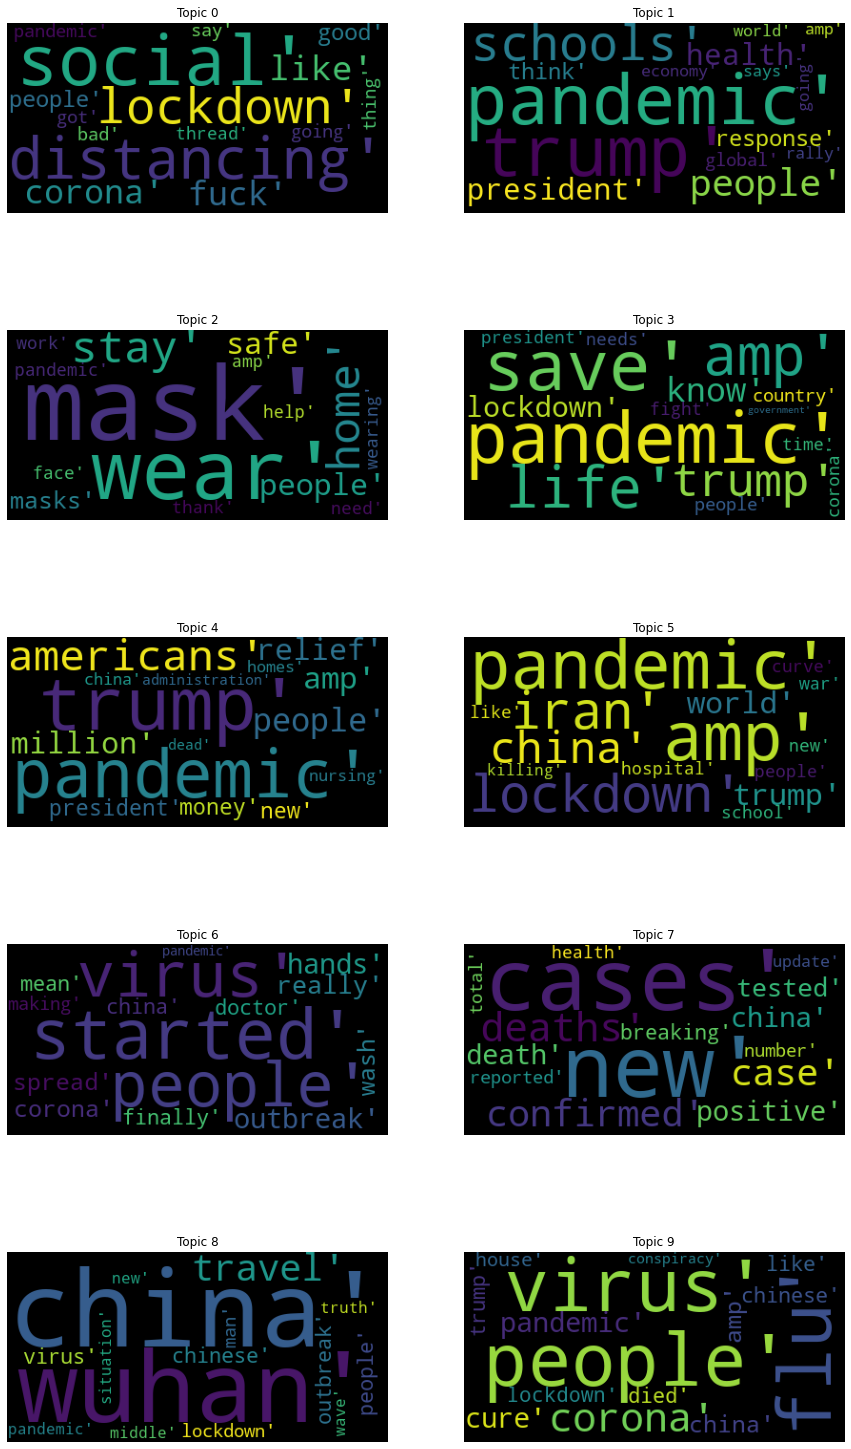

In [19]:
# Importing the word cloud to visulaize the word in each topic, this helps in knowing which words are more common in each topic
from wordcloud import WordCloud

# storing words for each topic in list to loop
words=df_topic_keywords.values.tolist()
fig, axes = plt.subplots(5, 2, figsize=(15,15))

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    try:
        topic_words = str(words[i])
        cloud = WordCloud()
        cloud.generate(topic_words)
        fig.subplots_adjust(top = 1.5)
        plt.imshow(cloud)
        plt.gca().set_title('Topic ' + str(i))
        plt.gca().axis('off')
    except IndexError:
        fig.delaxes(ax)
